In [85]:
import numpy as np
from data_handling_abword import read_data_abword_frequency, generate_seq_tsv

In [89]:
seq_file_name = 'C:\\Users\\TZY\\PycharmProjects\\Metagenomic Data\\Mgnify\\10genus\\train\\10genus_dict.npy'
seq_out_put = 'C:\\Users\\TZY\\PycharmProjects\\Metagenomic Data\\Mgnify\\10genus\\train\\Mgnify-10genus-prediction-50to200_train.tsv'
# generate_seq_tsv(seq_out_put, seq_file_name, 50, 200, 5)
label_path = 'C:\\Users\\TZY\\PycharmProjects\\Metagenomic Data\\Mgnify\\10genus\\train\\10genus_label_dict.npy'
LABEL_DICT = np.load(label_path, allow_pickle=True).item()
word_length = 4

In [91]:
x, y = read_data_abword_frequency(LABEL_DICT, seq_out_put, 4)
print(y)
print(x)

[7, 6, 1, 9, 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0

clf.support_vectors_
[[0.39149519 0.89635728]
 [0.97880407 2.26144744]
 [2.61311169 2.58774351]
 [1.6448857  1.20768141]
 [3.58057881 3.43199283]
 [4.02660689 4.12098876]
 [5.67474149 5.30948696]]
clf.n_support_
[1 3 2 1]
clf.support_
[ 1 10 14 16 20 28 31]
clf.dual_coef_
[[ 1.33143525 -0.43355065 -0.         -0.89788459 -0.12048409 -0.
  -0.04220442]
 [ 0.12048409  0.          1.21304109  0.         -1.21304109 -0.
  -0.11917911]
 [ 0.04220442  0.          0.11917911  0.          0.          0.48417772
  -0.48417772]]
clf.coef_
clf.intercept_
[2.32166302 1.42426621 1.25424389 6.71682103 2.79287738 6.58414668]
[[0.07026597 0.73452862 0.84501399 4.51913453 2.1036201  5.21071228]]
[0]


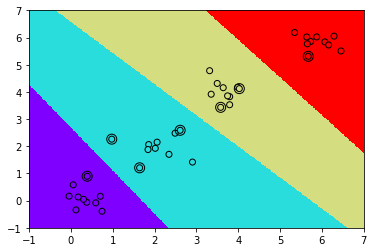

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

n_samples = [10, 10, 10, 10]
centers = [[0.0, 0.0], [2.0, 2.0], [4.0, 4.0], [6.0, 6.0]]
cluster_std = [0.4, 0.4, 0.4, 0.4]

x, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=0, shuffle=False)

clf = svm.SVC(kernel='linear', C=10, gamma=0.5, decision_function_shape='ovo')
clf.fit(x, y)

xx = np.linspace(-1, 7, 400)
yy = np.linspace(-1, 7, 400)
XX, YY = np.meshgrid(xx, yy)
XY = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.predict(XY).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.rainbow)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.rainbow, edgecolors='k')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

print('clf.support_vectors_')
print(clf.support_vectors_)

print('clf.n_support_')
print(clf.n_support_)

print('clf.support_')
print(clf.support_)

print('clf.dual_coef_')
print(clf.dual_coef_)

print('clf.coef_')
#print(clf.coef_)

print('clf.intercept_')
print(clf.intercept_)

print(clf.decision_function([[1, 1]]))
print(clf.predict([[1, 1]]))

plt.show()